In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score, silhouette_score, davies_bouldin_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [146]:
df = pd.read_csv("laptop_prices.csv")

In [147]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [149]:
# Crear una copia del DataFrame para el análisis de Machine Learning
df_ml = df.copy()

# Convertimos todas las columnas categóricas a números
label_encoders = {}
for col in df_ml.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])
    label_encoders[col] = le


In [150]:
# Modelo de regresión lineal
# Variables predictoras y objetivo
X = df_ml.drop('Price_euros', axis=1)
y = df_ml['Price_euros']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predicción
y_pred = reg_model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
print(f'Regresión Lineal - MSE: {mse:.2f}')


Regresión Lineal - MSE: 130615.05


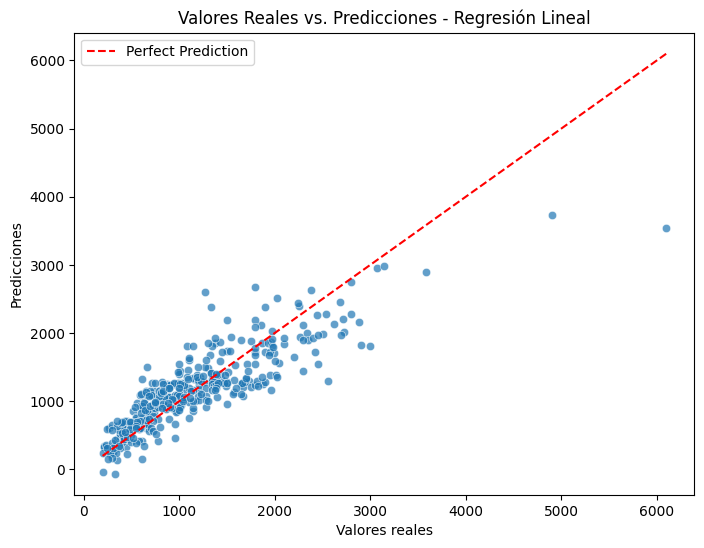

In [151]:
# Mostrar un gráfico de dispersión de los precios reales vs. predicciones
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones - Regresión Lineal')
plt.legend()
plt.show()

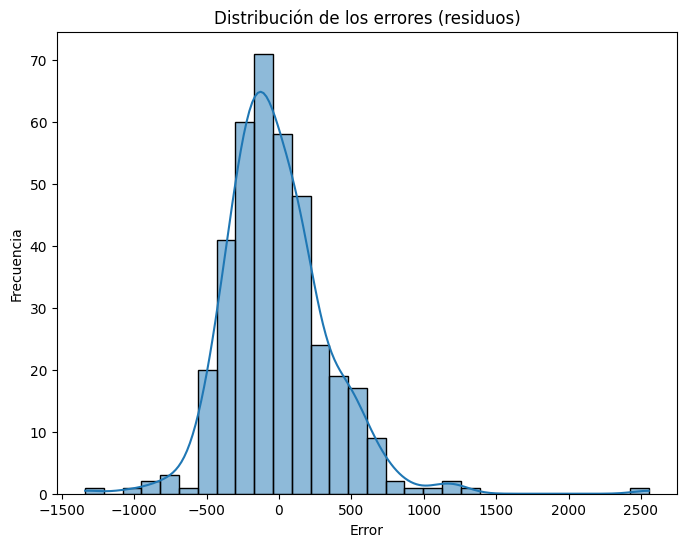

In [152]:
# Mostrar un gráfico de dispersión de los errores
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribución de los errores (residuos)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()


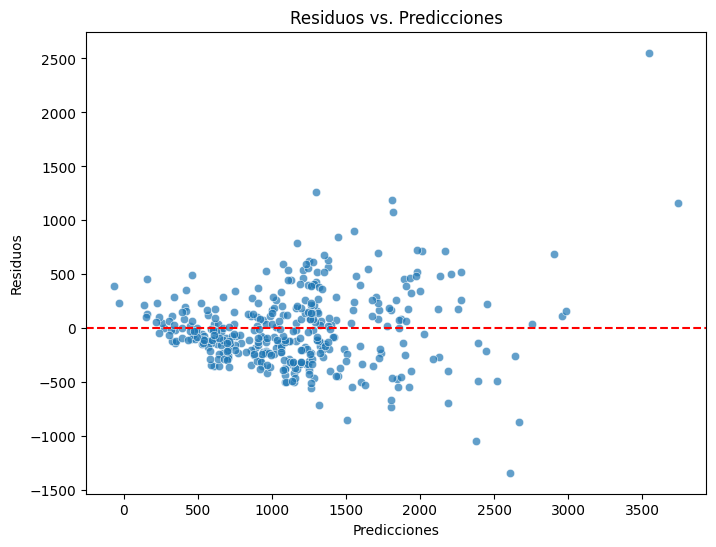

In [153]:
# Mostrar un gráfico de dispersión de los residuos vs. predicciones
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs. Predicciones')
plt.show()


Precisión KNN: 0.8302872062663186


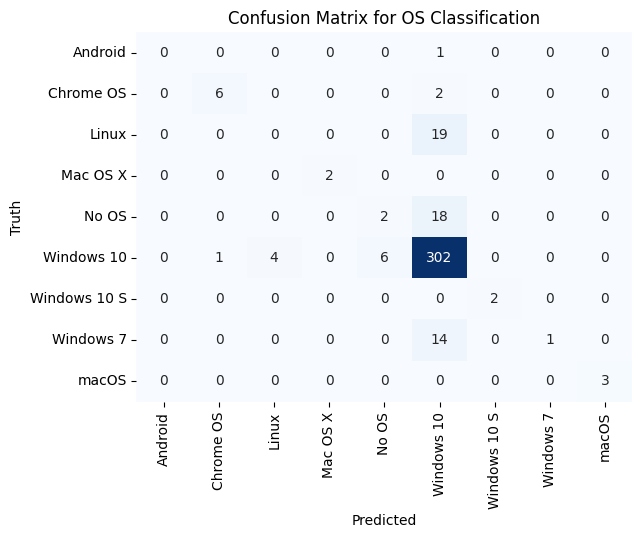

In [154]:
# Modelo KNN
# Separar características (X) y etiqueta (y)
X = df_ml.drop('OS', axis=1)
y = df_ml['OS']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_knn = model.predict(X_test_scaled)

# Evaluación
print(f"Precisión KNN: {accuracy_score(y_test, y_pred_knn)}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)

# Convertir etiquetas a números para la matriz de confusión
le = LabelEncoder()
y = le.fit_transform(df['OS'])

# Al graficar la matriz de confusión:
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_, 
            cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for OS Classification')
plt.show()


In [155]:
# Modelo kmeans
# Seleccionamos las variables numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_columns]

# Estandarizamos los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

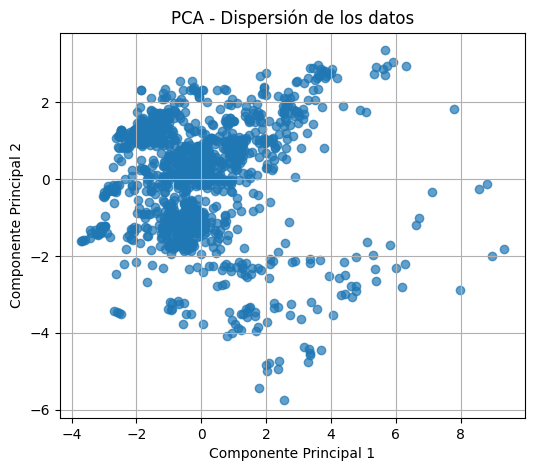

In [156]:
# Reducimos las dimensiones a 2 componentes con PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Visualizamos los clústeres en 2D
plt.figure(figsize=(6, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - Dispersión de los datos")
plt.grid()
plt.show()

In [157]:
# Aplicamos K-Means con 3 clústeres sobre los datos reducidos
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(data_scaled)
clusters_kmeans = kmeans.labels_
df_kmeans = df.copy()
df_kmeans['Cluster'] = clusters_kmeans


In [158]:
# Análisis de características por cluster en K-Means

# Seleccionamos solo las columnas numéricas
numerical_columns = df_kmeans.select_dtypes(include=['int64', 'float64']).columns
# Agrupamos por clúster y calculamos la media de cada característica
cluster_means_kmeans = df_kmeans.groupby('Cluster')[numerical_columns].mean()
cluster_means_kmeans

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
Cluster,,,,,,,,,
0,14.798639,6.814660,1.890657,905.117780,1747.865969,986.441885,2.227016,487.991623,3.740314
1,16.444601,13.352113,2.880005,1681.438122,1920.000000,1080.000000,2.605634,254.985915,955.436620
2,14.194393,13.177570,1.707028,2098.614486,3218.542056,1842.392523,2.378505,433.794393,162.691589


Text(0.5, 1.0, 'Características principales de cada cluster en K-Means')

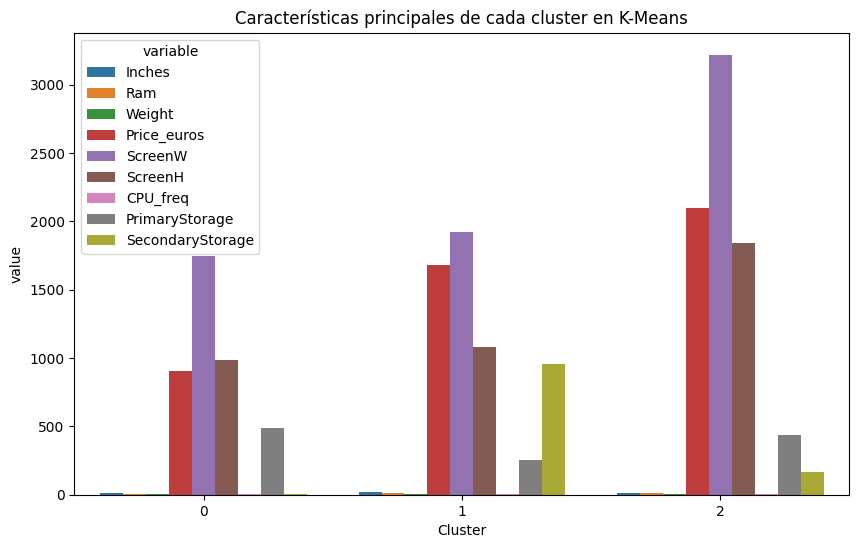

In [159]:
# Visualizamos las características principales de cada clúster
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_means_kmeans.reset_index().melt(id_vars='Cluster'), x='Cluster', y='value', hue='variable')
plt.title("Características principales de cada cluster en K-Means")

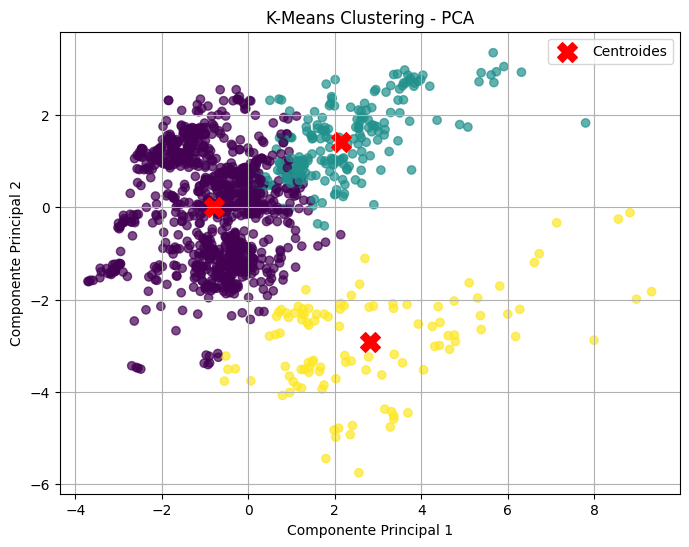

In [160]:
# Visualizamos la distribución de cada característica por clúster
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.7)

centroids = pca.transform(kmeans.cluster_centers_)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("K-Means Clustering - PCA")
plt.legend()
plt.grid()
plt.show()

In [161]:
# Evaluar el rendimiento del modelo
silhouette_kmeans = silhouette_score(data_scaled, clusters_kmeans)
print(f"Silhouette Score K-Means: {silhouette_kmeans:.4f}")
dbi_kmeans = davies_bouldin_score(data_scaled, clusters_kmeans)
print(f"Davies-Bouldin Index K-Means: {dbi_kmeans:.4f}")

Silhouette Score K-Means: 0.3470
Davies-Bouldin Index K-Means: 1.1571
